# d St = μ Stdt + σ StdWt
### Integrated form:
## log St = log S0 + ∫t0(μ−σ22)ds + ∫t0σdWs
## log St = log S0 + (μ−σ22)t + σWt
## log St ∼ N(logS0 + (μ−σ22)t, σ2t)  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Parameters
# drift coefficent
mu = 0.1
# number of steps
n = 100
# time in years
T = 10
# number of sims
M = 100
# initial stock price
S0 = 100
# volatility
sigma = 0.3

# GBM Paths
### Simulate a stock price directly throughout the simulation and multiply the exponential terms together at each time step.
### We can simulate the log normal distribution and cumulatevily add the terms along each sample path.

In [3]:
# calc each time step
dt = T/n
# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)
# include array of 1's
St = np.vstack([np.ones(M), St])
# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
St = S0 * St.cumprod(axis=0)

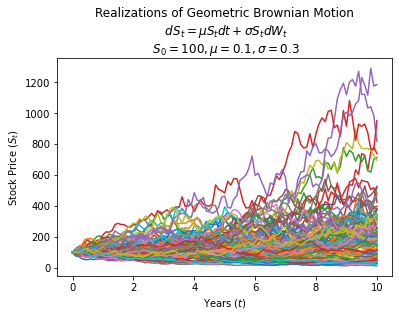

In [4]:
# Define time interval correctly 
time = np.linspace(0,T,n+1)
# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T
plt.plot(tt, St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
)
plt.show()